In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\Ineuron\Ml_projects\Fraud_Detection\Fraud_Detection.csv')

In [3]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [4]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [5]:
df.shape

(786363, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
df = df[0:50000]

In [8]:
df.shape

(50000, 29)

In [9]:
import pandas as pd

# Handle date-time columns
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDayOfWeek'] = df['transactionDateTime'].dt.weekday
df['transactionTimeOfDay'] = df['transactionDateTime'].dt.hour
df['isWeekend'] = df['transactionDateTime'].dt.weekday >= 5

# Create account-related features
df['accountUtilizationRatio'] = df['availableMoney'] / df['creditLimit']
df['balanceToLimitRatio'] = df['currentBalance'] / df['creditLimit']

# Aggregated features
df['transactionFrequency'] = df.groupby('customerId')['transactionAmount'].transform('count')

# Create CVV mismatch feature
df['cvvMismatch'] = df['cardCVV'] != df['enteredCVV']

# Drop columns that won't be useful for model building
df = df.drop(['accountNumber', 'customerId', 'transactionDateTime', 'cardCVV', 'enteredCVV', 'cardLast4Digits'], axis=1)

# Encode categorical columns (e.g., merchant-related, pos conditions)
df = pd.get_dummies(df, columns=['merchantCategoryCode', 'merchantCountryCode', 'merchantCity', 'merchantState'], drop_first=True)


In [10]:
# Separate numeric and categorical columns
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the mean
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Fill missing values in categorical columns with the most frequent value
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

# Now, you can proceed with encoding categorical variables and scaling


In [11]:
df.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,...,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,5000.0,5000.0,98.55,Uber,US,2.0,1.0,06/2023,2015-03-14,2015-03-14,...,False,False,False,False,False,True,False,False,False,True
1,5000.0,5000.0,74.51,AMC #191138,US,9.0,1.0,02/2024,2015-03-14,2015-03-14,...,False,False,False,False,False,False,False,False,False,True
2,5000.0,5000.0,7.47,Play Store,US,9.0,1.0,08/2025,2015-03-14,2015-03-14,...,True,False,False,False,False,False,False,False,False,True
3,5000.0,5000.0,7.47,Play Store,US,9.0,1.0,08/2025,2015-03-14,2015-03-14,...,True,False,False,False,False,False,False,False,False,True
4,5000.0,5000.0,71.18,Tim Hortons #947751,US,2.0,1.0,10/2029,2015-08-06,2015-08-06,...,False,False,False,False,False,False,False,False,False,True


In [12]:
df.isnull().sum()

creditLimit                                      0
availableMoney                                   0
transactionAmount                                0
merchantName                                     0
acqCountry                                       0
posEntryMode                                     0
posConditionCode                                 0
currentExpDate                                   0
accountOpenDate                                  0
dateOfLastAddressChange                          0
transactionType                                  0
echoBuffer                                   50000
currentBalance                                   0
merchantZip                                  50000
cardPresent                                      0
posOnPremises                                50000
recurringAuthInd                             50000
expirationDateKeyInMatch                         0
isFraud                                          0
transactionDayOfWeek           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   creditLimit                                50000 non-null  float64
 1   availableMoney                             50000 non-null  float64
 2   transactionAmount                          50000 non-null  float64
 3   merchantName                               50000 non-null  object 
 4   acqCountry                                 50000 non-null  object 
 5   posEntryMode                               50000 non-null  float64
 6   posConditionCode                           50000 non-null  float64
 7   currentExpDate                             50000 non-null  object 
 8   accountOpenDate                            50000 non-null  object 
 9   dateOfLastAddressChange                    50000 non-null  object 
 10  transactionType       

In [14]:
df['acqCountry'].fillna('US',inplace=True)
df['posEntryMode'].fillna(5.0,inplace=True)
df['posConditionCode'].fillna(1.0,inplace=True)
df['transactionType'].fillna('PURCHASE',inplace=True)

In [15]:
df.isnull().sum()

creditLimit                                      0
availableMoney                                   0
transactionAmount                                0
merchantName                                     0
acqCountry                                       0
posEntryMode                                     0
posConditionCode                                 0
currentExpDate                                   0
accountOpenDate                                  0
dateOfLastAddressChange                          0
transactionType                                  0
echoBuffer                                   50000
currentBalance                                   0
merchantZip                                  50000
cardPresent                                      0
posOnPremises                                50000
recurringAuthInd                             50000
expirationDateKeyInMatch                         0
isFraud                                          0
transactionDayOfWeek           

In [16]:
df['echoBuffer'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
df['merchantZip'].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df['posOnPremises'].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
df['recurringAuthInd'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
df.drop(['echoBuffer', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], inplace=True, axis=1)


In [21]:
df.isnull().sum()

creditLimit                                  0
availableMoney                               0
transactionAmount                            0
merchantName                                 0
acqCountry                                   0
posEntryMode                                 0
posConditionCode                             0
currentExpDate                               0
accountOpenDate                              0
dateOfLastAddressChange                      0
transactionType                              0
currentBalance                               0
cardPresent                                  0
expirationDateKeyInMatch                     0
isFraud                                      0
transactionDayOfWeek                         0
transactionTimeOfDay                         0
isWeekend                                    0
accountUtilizationRatio                      0
balanceToLimitRatio                          0
transactionFrequency                         0
cvvMismatch  

In [22]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    """
    Encodes categorical and object-type columns in the DataFrame using LabelEncoder.
    
    Parameters:
    - df: DataFrame to process.
    
    Returns:
    - encoded_df: DataFrame with encoded categorical columns.
    - encoders: Dictionary of LabelEncoder objects for each categorical column.
    """
    # Create a copy of the DataFrame
    encoded_df = df.copy()
    
    # Identify categorical columns
    categorical_cols = encoded_df.select_dtypes(include=['object', 'category','bool']).columns.tolist()
    
    # Apply Label Encoding
    encoders = {}
    for col in categorical_cols:
        encoder = LabelEncoder()
        encoded_df[col] = encoder.fit_transform(encoded_df[col])
        encoders[col] = encoder  # Store encoder for reversing transformations if needed
    
    return encoded_df, encoders


In [23]:
encoded_df, encoders = label_encode(df)

In [24]:
from sklearn.preprocessing import RobustScaler

def robust_scale_columns(df):
    """
    Standardizes all numerical columns in the DataFrame using RobustScaler.
    
    Parameters:
    - df: DataFrame to process.
    
    Returns:
    - scaled_df: DataFrame with scaled numerical columns using RobustScaler.
    - scaler: Fitted RobustScaler object.
    """
    # Create a copy of the DataFrame
    scaled_df = df.copy()
    
    # Identify numerical columns
    numerical_cols = scaled_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Apply RobustScaler
    scaler = RobustScaler()
    scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])
    
    return scaled_df, scaler


In [25]:
scaled_df, scaler = robust_scale_columns(encoded_df)

In [26]:
scaled_df

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,...,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US
0,0.0,0.356416,0.071020,1867,3,-0.75,0.0,73,218,218,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.356416,-0.081487,27,3,1.00,0.0,18,218,218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.356416,-0.506780,1192,3,1.00,0.0,103,218,218,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.356416,-0.506780,1192,3,1.00,0.0,103,218,218,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.356416,-0.102612,1865,3,-0.75,0.0,134,269,269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,-0.320451,-0.352814,2231,3,0.00,0.0,39,171,331,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,-0.325719,-0.288805,636,3,-0.75,0.0,21,171,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,-0.332662,-0.226508,2230,3,1.00,0.0,124,171,331,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,-0.341235,0.398680,26,3,-0.75,7.0,17,171,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X= scaled_df.drop('isFraud',axis=1)
y = scaled_df['isFraud']

In [28]:
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Combined resampling strategy
smote_enn = SMOTEENN(random_state=42)

# Resample dataset
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(
    scale_pos_weight=50,  # Adjust based on imbalance ratio
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False
)
model.fit(X_train, y_train)

# Evaluate
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      8690
         1.0       0.88      1.00      0.94      9661

    accuracy                           0.93     18351
   macro avg       0.94      0.93      0.93     18351
weighted avg       0.94      0.93      0.93     18351

ROC-AUC Score: 0.998324012564486


In [29]:
import numpy as np

# Evaluate performance across thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))

Threshold: 0.1
              precision    recall  f1-score   support

         0.0       1.00      0.61      0.76      8690
         1.0       0.74      1.00      0.85      9661

    accuracy                           0.82     18351
   macro avg       0.87      0.81      0.81     18351
weighted avg       0.86      0.82      0.81     18351

Threshold: 0.2
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84      8690
         1.0       0.80      1.00      0.89      9661

    accuracy                           0.87     18351
   macro avg       0.90      0.86      0.86     18351
weighted avg       0.89      0.87      0.86     18351

Threshold: 0.30000000000000004
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.87      8690
         1.0       0.83      1.00      0.91      9661

    accuracy                           0.89     18351
   macro avg       0.92      0.89      0.89     18351
weighted avg 

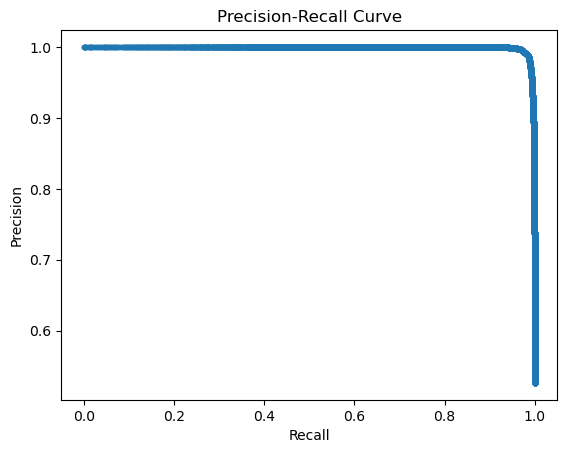

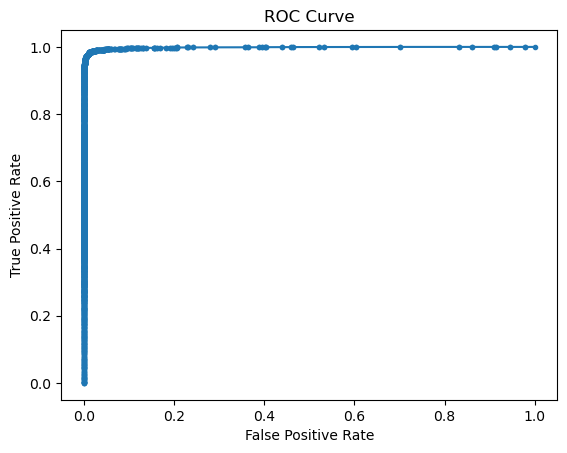

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, X_resampled, y_resampled, scoring="roc_auc", cv=5
)
print(f"Cross-Validated ROC-AUC: {scores.mean():.3f} ± {scores.std():.3f}")


Cross-Validated ROC-AUC: 0.985 ± 0.019
